In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

# TASK_1

Дана матрица объект-признак
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]
и значения целевой переменной
y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]
Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

* Если честно не понял как надо решить эту задачу.
Поэтому снала найду 2 призанка которые больще всего кореллируют с у, проверю что они не линейно зависимы. Потом добалю столбец единиц в матрицу признаков(так как я не понял в какких случаях он добавляается, а в каких нет)
А потом переберу все комбинации признаков с добавлением стобца единиц и без. И по R ** 2 выберу наилучшую модель, что бы хоть как то себя проверить

In [2]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array( [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [3]:
for i in range(X.shape[1]):
    print(f'x{i} - {np.corrcoef(y, X[:,i])[0,1]}')

x0 - 0.3516766886966433
x1 - 0.3998583479845226
x2 - 0.5826374546323105
x3 - 0.6029167757328505


In [4]:
np.corrcoef(X[:,2], X[:,3])[0,1]

0.12948069899052872

In [5]:
ones = np.ones((X.shape[0], 1))
X_1 = np.hstack((ones, X[:,2:4]))
X_1

array([[1.        , 3.03636353, 2.69287214],
       [1.        , 5.12093014, 3.46363202],
       [1.        , 5.79686488, 1.86159445],
       [1.        , 3.65529809, 1.66746094],
       [1.        , 2.50594319, 1.69755173],
       [1.        , 2.84124027, 4.54410559],
       [1.        , 1.95026215, 1.51874636],
       [1.        , 7.47708735, 2.61081203],
       [1.        , 3.61420599, 5.10773362],
       [1.        , 1.65752765, 1.59635987]])

In [6]:
XTX = X_1.T.dot(X_1)
np.linalg.det(XTX)

4547.328074863321

In [7]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(X_1.T).dot(y)
print(b)
print(f'y = {b[0]} + {b[1]}*x1 + {b[2]}*x2')

[3.64001086 0.70753914 1.04851745]
y = 3.640010859914204 + 0.7075391440843404*x1 + 1.0485174544175266*x2


In [8]:
z = b[0] + b[1] * X_1[:,1] + b[2] * X_1[:,2]
e = y - z
e

array([ 0.65005323, -1.19458502, -1.0212859 ,  0.7733305 , -1.0060853 ,
       -2.88174646,  0.96410803,  0.78182995,  2.73735653,  0.19702444])

In [9]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [10]:
R_2 = 1 - sum_of_squares(e) / sum_of_squares(y)
R_2

0.622441987650532

check:

In [11]:
xx = []
for i in range(X.shape[1]):
    for _ in range(i+1, X.shape[1]):
        xx.append(f'{i}{_}')
xx

['01', '02', '03', '12', '13', '23']

In [12]:
for i in xx:
    x1 = int(i[0])
    x2 = int(i[1])
    X_I = np.hstack((ones, X[:,x1:x2+1]))
    XTX = X_I.T.dot(X_I)
    if -1 < np.linalg.det(XTX) < 1:
        print(f'{i} error')
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(X_I.T).dot(y)
    z = b[0] + b[1] * X_I[:,1] + b[2] * X_I[:,2]
    e = y - z
    R2 = 1 - sum_of_squares(e) / sum_of_squares(y)
    print(f'1 + {i} - {R2}')

1 + 01 - 0.18113594742585215
1 + 02 - 0.030007909957041723
1 + 03 - 0.1160649381630785
1 + 12 - 0.5479482734039012
1 + 13 - 0.5350785945877207
1 + 23 - 0.622441987650532


In [13]:
for i in xx:
    x1 = int(i[0])
    x2 = int(i[1])
    X_I = X[:,x1:x2+1]
    XTX = X_I.T.dot(X_I)
    if -1 < np.linalg.det(XTX) < 1:
        print(f'{i} error')
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(X_I.T).dot(y)
    z = b[0] * X_I[:,0] + b[1] * X_I[:,1]
    e = y - z
    R2 = 1 - sum_of_squares(e) / sum_of_squares(y)
    print(f'{i} - {R2}')

01 - -0.38274614127996287
02 - -0.04199649065965638
03 - 0.1160649382158081
12 - 0.48658772399487094
13 - 0.5352084198311
23 - 0.40298145788934303


In [14]:
n = 10
m = 1

alpha = 0.05
k1 = m
k2 = n - m - 1

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

In [15]:
F = (R_2 / k1) / ((1 - R_2) / k2)
print(F > t)

True


# TASK_2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.
Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.
* Посчитайте среднюю ошибку аппроксимации.

In [16]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = salary
y = scoring

In [17]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)

print(f'scoring = {b0} + {b1}*salary')

scoring = 444.1773573243596 + 2.620538882402765*salary


In [18]:
x_1 = np.array([[1, 35],
[1, 45],
[1, 190],
[1, 200],
[1, 40],
[1, 70],
[1, 54],
[1, 150],
[1, 120],
[1, 110]])
XTX = x_1.T.dot(x_1)
np.linalg.det(XTX)

349464.00000000023

In [19]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x_1.T).dot(y)
print(f'scoring = {b[0]} + {b[1]}*salary')

scoring = 444.17735732435915 + 2.6205388824027684*salary


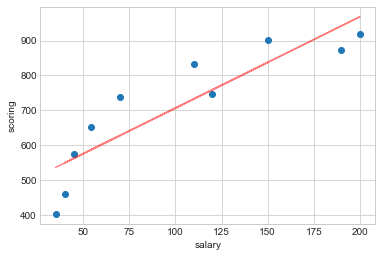

In [20]:
ox = x
oy = b[0] + b[1] * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [21]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [22]:
z = b[0] + b[1] * x
e = y - z
R = 1 - sum_of_squares(e) / sum_of_squares(y)
R

0.7876386635293685

In [25]:
n = 10
m = 1

alpha = 0.05
k1 = m
k2 = n - m - 1

t = stats.f.ppf(1 - alpha, k1, k2)
F = (R / k1) / ((1 - R) / k2)
print(f'F = {F}, t ={t}, {F > t}')

F = 29.67164085966449, t =5.317655071578714, True


In [26]:
alpha = 0.05
n = x.shape[0]
upper = ((y - z) ** 2).sum() / (n - 2)
lower = ((x - x.mean()) ** 2).sum()
S_slope = np.sqrt(upper / lower)
t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)
(b[1] + t1 * S_slope, b[1] + t2 * S_slope)

(1.5111599662593749, 3.729917798546162)

In [27]:
S_intercept = S_slope * np.sqrt((x ** 2).mean())
(b[0] + t1 * S_intercept, b[0]+ t2 * S_intercept)

(313.9653804816358, 574.3893341670824)

In [29]:
a_mean = np.abs(e / y * 100).mean()
a_mean

11.469251843561711